In [56]:
import os
os.chdir('c:/users/pablo/desktop/ml7331/')

In [57]:
# Import Libraries Required.

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

# import custom code
from cleaning import read_clean_data, missing_values_table, load_bureau, create_newFeatures, merge_newFeatures, fill_occupation_type
from tables import count_values_table

# some defaults
pd_max_rows_default = 60

#removing warnings
import warnings
warnings.simplefilter('ignore')

In [58]:
# load data 
# path =  './application_train.csv'
# note that XNA is a encoding for NA interpret as np.nan
df =  pd.read_csv('./application_train.csv',
                 na_values = ['XNA'])
#loading bureau dataset

bureau = pd.read_csv('./bureau.csv',
                    na_values = ['XNA'])

In [59]:
# read in the clean data and verify there are no missing values
pd.set_option('display.max_rows', 122)
data = read_clean_data()

# load the bureau dataset if not loaded
if 'bureau' not in globals():
    bureau = pd.read_csv('./bureau.csv', na_values = ['XNA'])

#engineering features from bureau dataset
newFeatures = create_newFeatures(bureau)
newFeatures.head()
newFeatures = newFeatures.fillna(0)
# merge datasets on loan ID
data = data.merge(newFeatures, on = 'SK_ID_CURR', how = 'left')
# fill all NAs with 0 in the new columns
fn_columns = list(newFeatures.columns)
for name in fn_columns:
    data[name] = data[name].fillna(0)

In [60]:
        ###############################################################################################################################
        ###############################################################################################################################
        ###############################################################################################################################
        #########                                                                                                             ######### 
        ######                                                                                                                   ######
        ###     This block normalizes the numeric data in the dataframe, then drops outliers based on the 3rd standard deviation    ###
        ######                                                                                                                   ######
        #########                                                                                                             #########
        ###############################################################################################################################
        ###############################################################################################################################
        ###############################################################################################################################

from scipy import stats

# transform data
data['DAYS_REGISTRATION'] = (data['DAYS_REGISTRATION'].astype(float)**(1/2))
data['ANNUITY_INCOME_RATIO'] = (data['ANNUITY_INCOME_RATIO'].astype(float)**(1/3))
data['CREDIT_INCOME_RATIO'] = (data['CREDIT_INCOME_RATIO'].astype(float)**(1/7))
data['AMT_ANNUITY'] = (data['AMT_ANNUITY'].astype(float)**(1/4))
data['DAYS_EMPLOYED'] = (data['DAYS_EMPLOYED'].astype(float)**(1/5))
data['PERCENT_EMPLOYED_TO_AGE'] = (data['PERCENT_EMPLOYED_TO_AGE'].astype(float)**(1/2))
data['AMT_GOODS_PRICE'] = (data['AMT_GOODS_PRICE'].astype(float)**(1/6))
data['AMT_INCOME_TOTAL'] = (data['AMT_INCOME_TOTAL'].astype(float)**(1/50))
data['AMT_CREDIT'] = (data['AMT_CREDIT'].astype(float)**(1/6))
data['REGION_POPULATION_RELATIVE'] = (data['REGION_POPULATION_RELATIVE'].astype(float)**(1/2))
data['DAYS_ID_PUBLISH'] = (data['DAYS_ID_PUBLISH'].astype(float)**(1/1.4059))
data['OWN_CAR_AGE'] = (data['OWN_CAR_AGE'].astype(float)**(1/3))
data['DAYS_LAST_PHONE_CHANGE'] = (data['DAYS_LAST_PHONE_CHANGE'].astype(float)**(1/3)) ############
data['LOAN_COUNT'] = (data['LOAN_COUNT'].astype(float)**(1/6)) ###########
data['CREDIT_ACTIVE'] = (data['CREDIT_ACTIVE'].astype(float)**(1/4))
data['AMT_CREDIT_SUM'] = (data['AMT_CREDIT_SUM'].astype(float)**(1/8))################
data['AMT_REQ_CREDIT_BUREAU_YEAR'] = (data['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(float)**(1/4))
data['AMT_CREDIT_SUM_DEBT'] = (data['AMT_CREDIT_SUM_DEBT'].astype(float)**(1/7)) ####################
data['AMT_CREDIT_SUM_LIMIT'] = (data['AMT_CREDIT_SUM_LIMIT'].astype(float)**(1/5))####################

# index columns selected for outlier removal
varTransforms = ['DAYS_REGISTRATION','ANNUITY_INCOME_RATIO','CREDIT_INCOME_RATIO','AMT_ANNUITY'
                 ,'DAYS_EMPLOYED','PERCENT_EMPLOYED_TO_AGE','AMT_GOODS_PRICE','AMT_INCOME_TOTAL'
                 ,'AMT_CREDIT','REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH','OWN_CAR_AGE'
                 ,'DAYS_LAST_PHONE_CHANGE','LOAN_COUNT','CREDIT_ACTIVE','AMT_CREDIT_SUM'
                 ,'AMT_REQ_CREDIT_BUREAU_YEAR','AMT_CREDIT_SUM_DEBT','AMT_CREDIT_SUM_LIMIT']

# split datasets based on columns selected
num_train = data[varTransforms]
cat_train = data.drop(varTransforms, axis=1)

# perform two-tailed z-test to index only observations within 3 standard devations of the mean
indx = np.abs(stats.zscore(num_train) < 3).all(axis=1)
train_cleaned_numeric = pd.concat([num_train.loc[indx], cat_train.loc[indx]], axis=1)

# back-transform data for prior knowledge
# data['DAYS_REGISTRATION'] = (data['DAYS_REGISTRATION'])**(2)
# data['ANNUITY_INCOME_RATIO'] = (data['ANNUITY_INCOME_RATIO'])**(3)
# data['CREDIT_INCOME_RATIO'] = (data['CREDIT_INCOME_RATIO'])**(7)
# data['AMT_ANNUITY'] = (data['AMT_ANNUITY'])**(4)
# data['DAYS_EMPLOYED'] = (data['DAYS_EMPLOYED'])**(5)
# data['PERCENT_EMPLOYED_TO_AGE'] = (data['PERCENT_EMPLOYED_TO_AGE'])**(2)
# data['AMT_GOODS_PRICE'] = (data['AMT_GOODS_PRICE'])**(6)
# data['AMT_INCOME_TOTAL'] = (data['AMT_INCOME_TOTAL'])**(50)
# data = data[data.AMT_INCOME_TOTAL < 400000]

In [61]:
data = data.dropna()

In [62]:
import scipy.stats as spstats

In [ ]:
data.columns

In [65]:
X = data.drop(['TARGET'], axis=1)
y = data['TARGET']
#spstats.bartlett(X,y)

In [78]:
data.numeric = data.select_dtypes(include=['float64','uint16','int64'])

In [86]:
X = data.numeric.drop(['TARGET'], axis=1)
y = data.numeric['TARGET']

In [88]:
# Create an 80/20 train/test split in the data
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(245035, 29) (245035,)
(61259, 29) (61259,)


In [ ]:
data.dtypes

In [ ]:
spstats.bartlett(data)

In [ ]:
.bartlett as bartlett

In [93]:
spstats.mstats.f_value_wilks_lambda(;)

SyntaxError: invalid syntax (<ipython-input-93-86673959d4fb>, line 1)

In [89]:
# Quadratic Discriminant Analysis pt 1
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
QDA_model = qda.fit(X_train, y_train)

In [90]:
# Quadratic Discriminant Analysis pt 2
print(QDA_model.priors_)
print(QDA_model.means_)

[0.91921154 0.08078846]
[[1.26905456e+00 8.89813800e+00 1.25043191e+01 8.74018716e+00
  1.37446028e-01 1.61397307e+04 3.60495436e+00 6.54562670e+01
  2.88250593e+02 7.13093945e-01 2.23981103e-01 5.22231287e-01
  4.19445303e-01 1.41223767e+00 1.38901345e-01 1.39544661e+00
  9.62488734e-02 8.36850813e+00 7.72902615e-01 1.18594227e+00
  5.49138103e-01 2.97063882e-01 1.09800983e+00 8.50831520e-01
  3.33053778e+00 3.71967695e+00 3.76563297e+00 1.25146090e+00
  1.25908605e+02]
 [1.26825570e+00 8.84151096e+00 1.24988151e+01 8.64639527e+00
  1.31843473e-01 1.48619352e+04 3.67034296e+00 6.14893092e+01
  2.66331654e+02 6.75698320e-01 1.57911560e-01 4.10430657e-01
  3.03285764e-01 1.50565771e+00 1.95999192e-01 1.48742170e+00
  1.40432411e-01 7.64517283e+00 7.67962645e-01 1.18564227e+00
  5.55309653e-01 2.85746963e-01 1.04783691e+00 8.91253344e-01
  4.50292988e+00 3.78295973e+00 4.06489276e+00 1.41117498e+00
  7.42133403e+02]]


In [91]:
# Quadratic Discriminant Analysis pt 3
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds_QDA=QDA_model.predict(X_test)
print(np.unique(preds_QDA, return_counts=True))
print(confusion_matrix(preds_QDA, y_test))
print(classification_report(y_test, preds_QDA, digits=3))

(array([0, 1], dtype=int64), array([59044,  2215], dtype=int64))
[[54528  4516]
 [ 1779   436]]
              precision    recall  f1-score   support

           0      0.924     0.968     0.945     56307
           1      0.197     0.088     0.122      4952

    accuracy                          0.897     61259
   macro avg      0.560     0.528     0.534     61259
weighted avg      0.865     0.897     0.879     61259



In [92]:
# Quadratic Discriminant Analysis pt 4
confusion_matrix = pd.crosstab(y_test, preds_QDA, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted      0     1
Actual                
0          54528  1779
1           4516   436


In [133]:
        #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
        #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
        #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
        #@@@@@@@@                                                                                                             @@@@@@@@@ 
        #@@@@@                                                                                                                   @@@@@@
        #@@                                This Block: Random Forest Classification for Feature Importance                          @@@
        #@@@@@                                                                                                                   @@@@@@
        #@@@@@@@@                                                                                                             @@@@@@@@@
        #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
        #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
        #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

from sklearn.ensemble import RandomForestClassifier
from pandas import DataFrame
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#y_train = data['TARGET']

# encode categorical data
new_df = data.copy().drop(['TARGET'], axis = 1)
new_df = pd.get_dummies(new_df)

# instantiate the random forest classification model
forest = RandomForestClassifier()

train = data.numeric
#X_train = train.loc[:, train.columns != ('TARGET','SK_ID_CURR')] when used with new_df
#X_train = train.loc[:, train.columns != ('TARGET')]

# fit the random forest model
forest.fit(X_train, y_train)

feature_importances = pd.DataFrame(forest.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)

pd.set_option('display.max_rows', None)
#feature_importances.drop(['SK_ID_CURR','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']).head(15)
#feature_importances.drop(['SK_ID_CURR','EXT_SOURCE_1','EXT_SOURCE_3']).head(15) use with new_df
feature_importances.drop(['EXT_SOURCE_1','EXT_SOURCE_3']).head(15)

,importance
EXT_SOURCE_2,0.079381
DAYS_BIRTH,0.057039
DAYS_ID_PUBLISH,0.055631
DAYS_REGISTRATION,0.054228
ANNUITY_INCOME_RATIO,0.050703
AMT_ANNUITY,0.048682
CREDIT_INCOME_RATIO,0.048432
PERCENT_EMPLOYED_TO_AGE,0.046610
DAYS_LAST_PHONE_CHANGE,0.046608
DAYS_EMPLOYED,0.044527


In [ ]:
scipy.stats.mstats.f_value_wilks_lambda

In [ ]:
y_train = data['TARGET']
# new_df = data.copy().drop(['TARGET','EMPLOYED','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'], axis = 1)
new_df = data.copy().drop(['TARGET','EMPLOYED','EXT_SOURCE_1','EXT_SOURCE_3'], axis = 1)

In [106]:
        #$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
        #$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
        #$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
        #$$$$$$$$                                                                                                             $$$$$$$$$ 
        #$$$$$                                                                                                                   $$$$$$
        #$$                        This Block: Light Gradient Boosting Classification for Feature Importance                        $$$
        #$$$$$                                                                                                                   $$$$$$
        #$$$$$$$$                                                                                                             $$$$$$$$$
        #$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
        #$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
        #$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier
from lightgbm import plot_importance

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=30)

In [118]:
df_y_lgb = data['TARGET']
embeded_lgb_selector.fit(data.numeric, df_y_lgb);

In [122]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = df_LGB.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')
embeded_lgb_feature

15 selected features


['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'DAYS_REGISTRATION',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE']

In [138]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# X, y = shuffle(boston.data, boston.target, random_state=13)
# X = X.astype(np.float32)
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
#clf = ensemble.GradientBoostingRegressor(X)

In [139]:
clf.fit(X, y)
# mse = mean_squared_error(y_test, clf.predict(X_test))
# print("MSE: %.4f" % mse)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

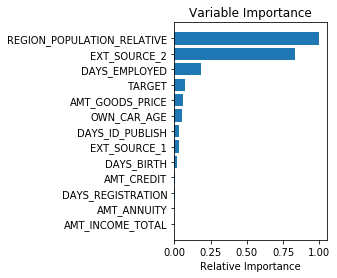

In [149]:
feature_importance = clf.feature_importances_
#feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance = (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, data.numeric.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
data.to_csv('c:/users/pablo/desktop/ml_project_dataset.csv')

In [151]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X, y)
mse = mean_squared_error(y, clf.predict(X))
print("MSE: %.4f" % mse)

MSE: 1.8760


Text(0, 0.5, 'Deviance')

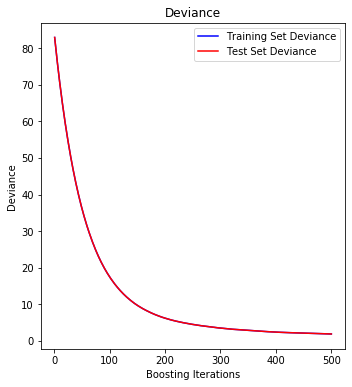

In [153]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X)):
    test_score[i] = clf.loss_(y, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import linear_model

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
np.random.seed(123)

In [ ]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

X = sm.add_constant(X)
y = np.dot(X, beta) + e

y = data['TARGET']
X = data.drop(['TARGET','SK_ID_CURR'])
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())